# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve


## Exploratory Data Analysis and Visualization

In [644]:
data_orig=pd.read_excel("Raisin_Dataset.xlsx")
data=data_orig.copy()
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [645]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [646]:
data["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [647]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


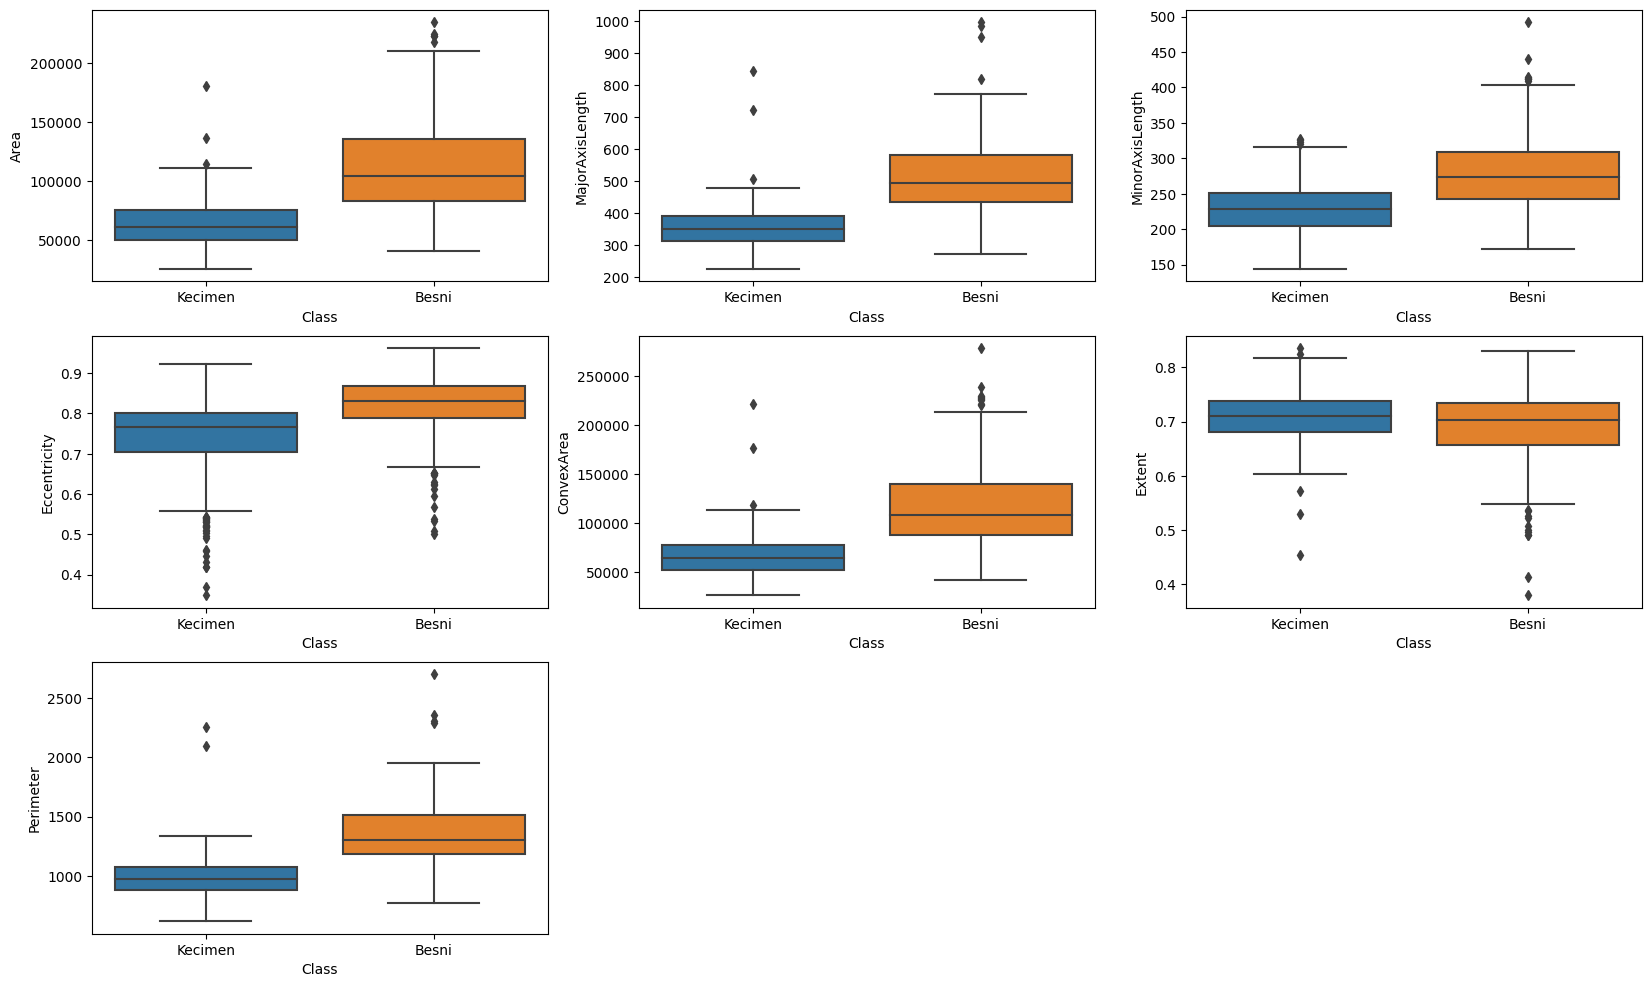

In [648]:
plt.figure(figsize=(20,12))
index=0
for column_name in data.columns[:-1]:
    index+=1
    plt.subplot(3,3,index)
    sns.boxplot(data=data, x="Class", y=column_name)

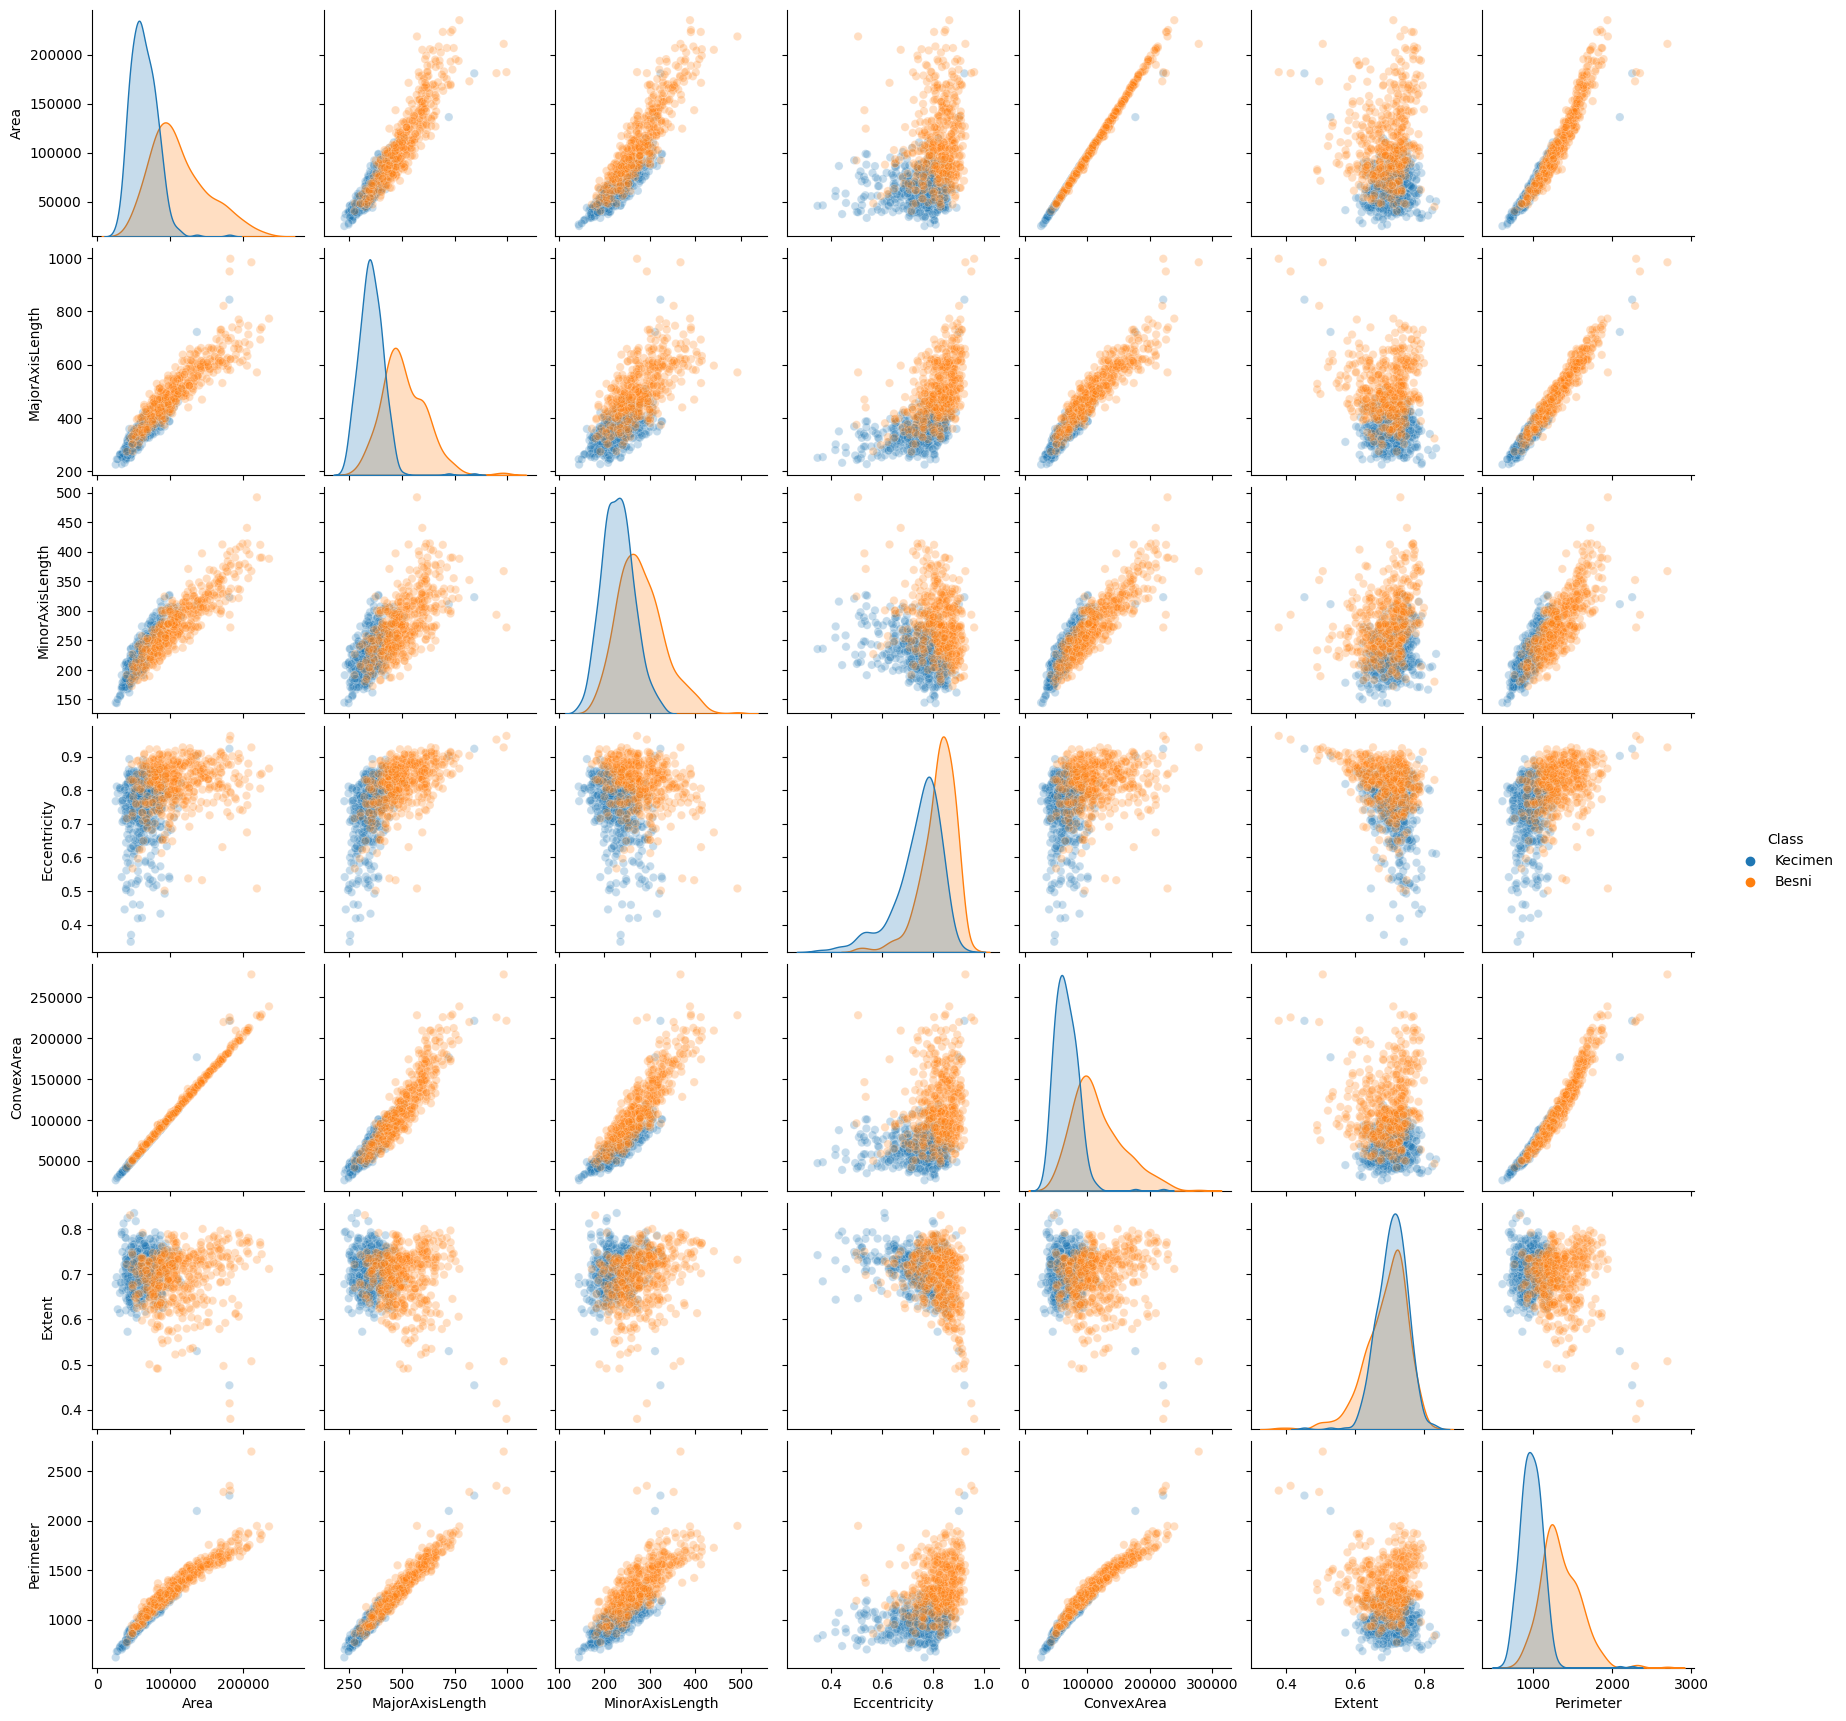

In [649]:
sns.pairplot(data=data, hue="Class", plot_kws={"alpha":0.25});

## Train | Test Split and Scaling



In [650]:
X=data.drop(["Class"], axis=1)
y=data["Class"]

In [651]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=20)

In [652]:
y_train_01=pd.Series(y_train).replace({"Kecimen":0,"Besni":1})
print(y_train_01)
y_test_01=pd.Series(y_test).replace({"Kecimen":0,"Besni":1})
print(y_test_01)

652    1
874    1
532    1
848    1
805    1
      ..
218    0
223    0
271    0
474    1
355    0
Name: Class, Length: 720, dtype: int64
780    1
893    1
574    1
200    0
575    1
      ..
175    0
482    1
89     0
666    1
594    1
Name: Class, Length: 180, dtype: int64


## KNN (K-Nearest Neighbors)


In [653]:
operations= [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())] #default n=5
pipe_model= Pipeline(steps=operations)
pipe_model.fit(X_train,y_train_01)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [654]:
y_pred=pipe_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1])

In [655]:
y_pred_proba=pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. ,

In [656]:
my_dict = {"Actual": y_test_01, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
847,1,1,1.0,0.0
337,0,0,0.2,0.8
120,0,0,0.4,0.6
213,0,0,0.0,1.0
80,0,0,0.0,1.0
591,1,1,1.0,0.0
798,1,0,0.0,1.0
590,1,1,1.0,0.0
526,1,1,0.6,0.4
261,0,0,0.2,0.8


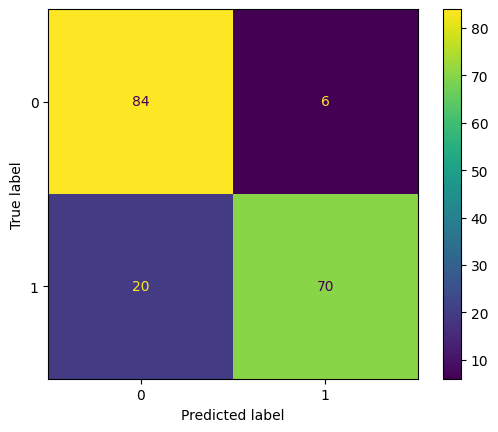

In [657]:
predictions = pipe_model.predict(X_test)
cm = confusion_matrix(y_test_01, predictions, labels=pipe_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_model.classes_)
disp.plot();

In [658]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [659]:
eval_metric(pipe_model, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[84  6]
 [20 70]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        90
           1       0.92      0.78      0.84        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.85       180
weighted avg       0.86      0.86      0.85       180


Train_Set
[[326  34]
 [ 49 311]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       360
           1       0.90      0.86      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Elbow Method for Choosing Reasonable K Values

In [660]:
test_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("KNN", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train_01, scoring = ['accuracy'], cv = 10, error_score="raise")
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

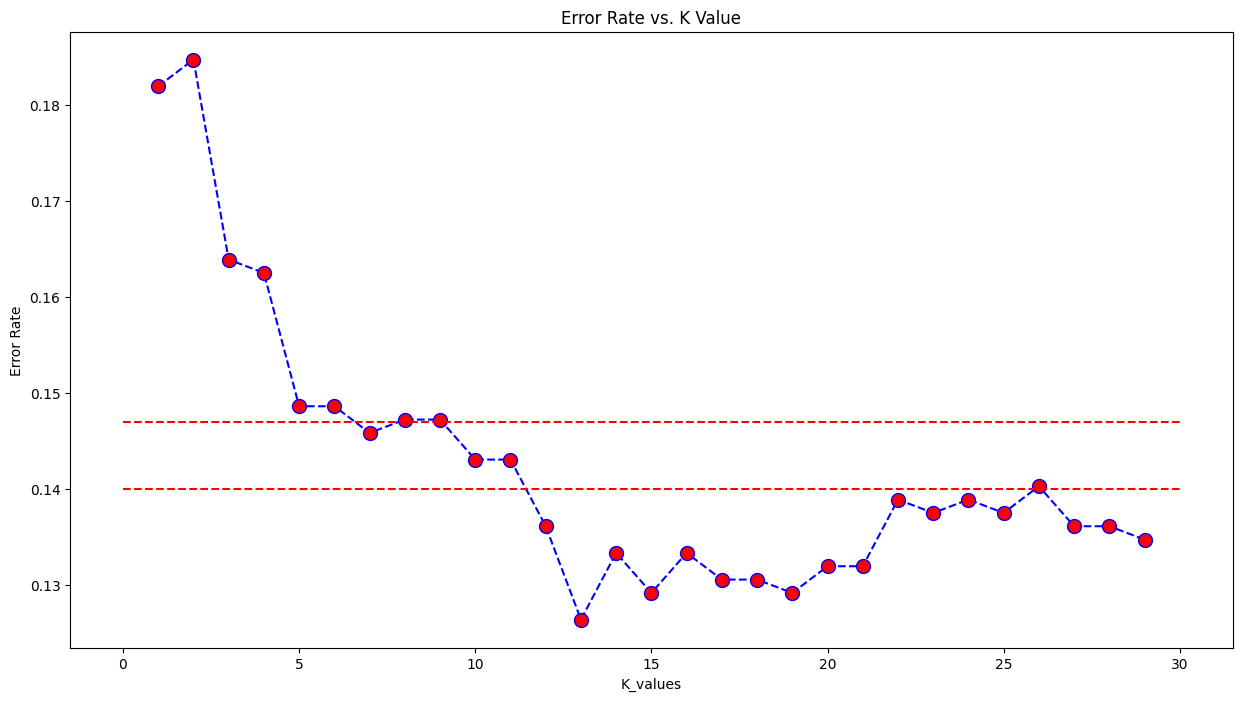

In [661]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.147, xmin = 0, xmax = 30, colors= 'r', linestyles="--")


In [662]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("KNN", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train_01) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train_01, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

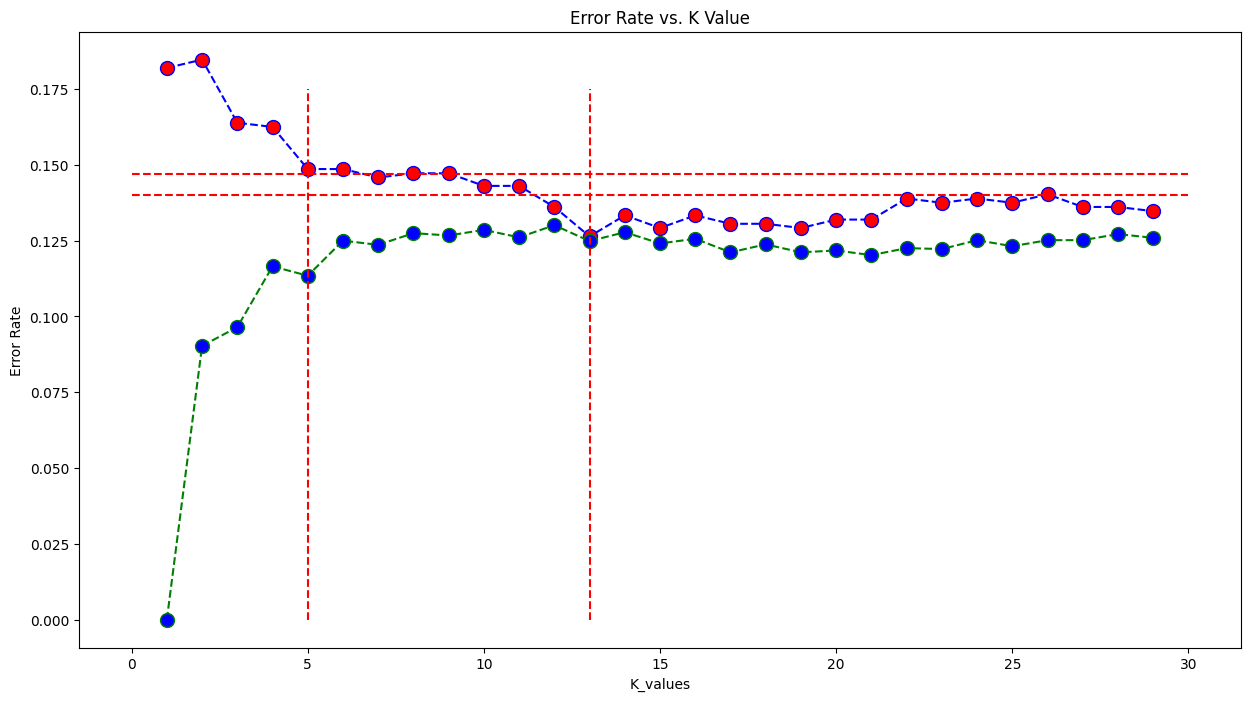

In [682]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.147, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.vlines(x=5, ymin = 0, ymax = 0.175, colors= 'r', linestyles="--")
plt.vlines(x=13, ymin = 0, ymax = 0.175, colors= 'r', linestyles="--")


### Scores by Various K Values


In [664]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train_01)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train_01, X_test, y_test_01)   #30 error

WITH K=1

Test_Set
[[76 14]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        90
           1       0.84      0.82      0.83        90

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180


Train_Set
[[360   0]
 [  0 360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [703]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
knn10 = Pipeline(steps=operations)

knn10.fit(X_train, y_train_01)
print('WITH K=10\n')
eval_metric(knn10, X_train, y_train_01, X_test, y_test_01) #30 error

WITH K=10

Test_Set
[[84  6]
 [24 66]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        90
           1       0.92      0.73      0.81        90

    accuracy                           0.83       180
   macro avg       0.85      0.83      0.83       180
weighted avg       0.85      0.83      0.83       180


Train_Set
[[332  28]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       360
           1       0.91      0.82      0.87       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



In [666]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)

knn5.fit(X_train, y_train_01)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train_01, X_test, y_test_01) # 26 Error

WITH K=5

Test_Set
[[84  6]
 [20 70]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        90
           1       0.92      0.78      0.84        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.85       180
weighted avg       0.86      0.86      0.85       180


Train_Set
[[326  34]
 [ 49 311]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       360
           1       0.90      0.86      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



In [708]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=13))]
knn13 = Pipeline(steps=operations)

knn13.fit(X_train, y_train_01)
print('WITH K=13\n')
eval_metric(knn13, X_train, y_train_01, X_test, y_test_01) # 28 error 

WITH K=13

Test_Set
[[82  8]
 [20 70]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.90      0.78      0.83        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[326  34]
 [ 57 303]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       360
           1       0.90      0.84      0.87       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



### Cross Validate


In [696]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=13))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train_01, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.001802,0.002509,0.861111,0.876543,0.882353,0.903974,0.833333,0.842593,0.857143,0.872204
2,0.001498,0.002630,0.847222,0.875000,0.857143,0.906355,0.833333,0.836420,0.845070,0.869984
3,0.001226,0.002235,0.861111,0.878086,0.882353,0.899023,0.833333,0.851852,0.857143,0.874802
4,0.001361,0.002532,0.861111,0.878086,0.906250,0.899023,0.805556,0.851852,0.852941,0.874802
5,0.001183,0.002766,0.902778,0.871914,0.967742,0.892508,0.833333,0.845679,0.895522,0.868463
6,0.001615,0.002430,0.875000,0.876543,0.965517,0.901316,0.777778,0.845679,0.861538,0.872611
7,0.001487,0.002487,0.833333,0.875000,0.875000,0.900990,0.777778,0.842593,0.823529,0.870813
8,0.001329,0.002762,0.861111,0.876543,0.882353,0.903974,0.833333,0.842593,0.857143,0.872204
9,0.001093,0.002736,0.916667,0.875000,0.916667,0.895765,0.916667,0.848765,0.916667,0.871632
10,0.001201,0.002229,0.916667,0.868827,0.916667,0.902357,0.916667,0.827160,0.916667,0.863124


In [697]:
df_scores.mean()[2:]

test_accuracy      0.873611
train_accuracy     0.875154
test_precision     0.905204
train_precision    0.900528
test_recall        0.836111
train_recall       0.843519
test_f1            0.868336
train_f1           0.871064
dtype: float64


### Gridsearch Method for Choosing Reasonable K Values

In [698]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)
k_values= range(1,30)
metric = ['minkowski'] 
weight = ['uniform', 'distance'] 
p = [1,2] 
param_grid = {"knn__n_neighbors":k_values, "knn__p": p, "knn__weights": weight, 'knn__metric': metric}

knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True, scoring= 'accuracy',n_jobs=-1)

In [699]:
knn_grid_model.fit(X_train, y_train_01)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [700]:
knn_grid_model.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 13,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [701]:
knn_grid_model.best_index_

50

In [674]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.873611
mean_train_score    0.875154
Name: 50, dtype: object

In [675]:
eval_metric(knn5, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[84  6]
 [20 70]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        90
           1       0.92      0.78      0.84        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.85       180
weighted avg       0.86      0.86      0.85       180


Train_Set
[[326  34]
 [ 49 311]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       360
           1       0.90      0.86      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



In [676]:
eval_metric(knn_grid_model, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[82  8]
 [20 70]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.90      0.78      0.83        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[326  34]
 [ 57 303]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       360
           1       0.90      0.84      0.87       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

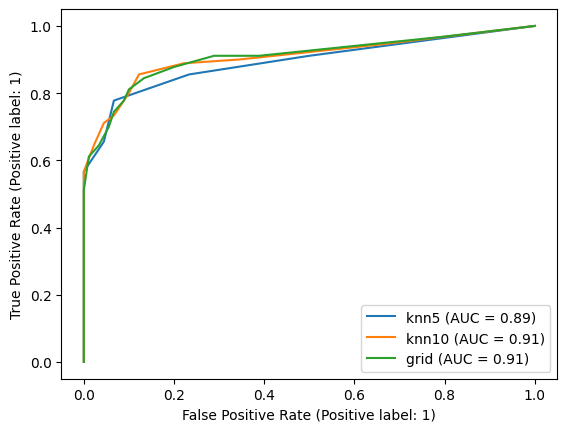

In [705]:
fig, ax = plt.subplots(ncols=1, sharey=True)
RocCurveDisplay.from_estimator(knn5, X_test, y_test_01, ax=ax, name="knn5")
RocCurveDisplay.from_estimator(knn10, X_test, y_test_01, ax=ax, name="knn10")
#RocCurveDisplay.from_estimator(knn20, X_test, y_test_01, ax=ax, name="knn20")
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test_01, ax=ax, name="grid");

In [707]:
y_pred_proba = knn_grid_model.predict_proba(X_test)
roc_auc_score(y_test_01, y_pred_proba[:,1])

0.9076543209876543

# Conclusion 
* KNN_13 (grid) Model ---> accuracy: 0.84 ---> roc_auc: 0.91 --->  28 false predictions
* KNN_5 (elbow) Model ---> accuracy: 0.86 ---> roc_auc: 0.89 --->  26 false predictions

* Two of the scores for KNN_5 model are better than KNN_13. 
* KNN_5 would be more cost efficient option to choose. However, if cost is not an issue, KNN_13 is also a good option.